Checking for data updates...
[INFO] SXR8.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] SXR8.DE is already up to date.
[INFO] EUNL.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] EUNL.DE is already up to date.
[INFO] VGWE.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] VGWE.DE is already up to date.
Dati caricati: 1510 righe
=== PORTFOLIO RISK METRICS (Daily) ===
Mean_Daily_Return        : 0.000558
Volatility_Daily         : 0.008666
Skewness                 : -0.502390
Kurtosis                 : 3.861950
VaR_Parametric_99        : -0.019602
VaR_Historical_99        : -0.024200
VaR_CornishFisher_99     : -0.029805
CVaR_99                  : -0.034335


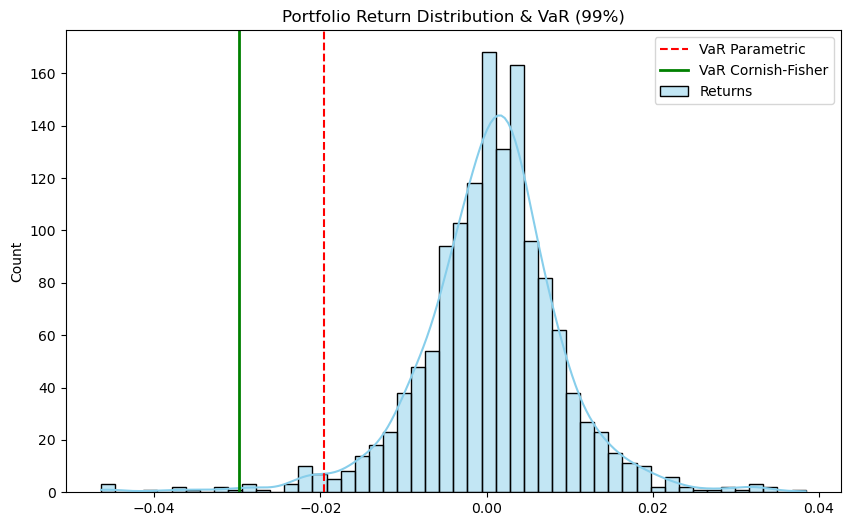

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
sys.path.append(os.path.abspath('..'))

from src.database import MarketDB
from src.risk import RiskEngine

# 1. Load Data
db = MarketDB()
tickers = ["SXR8.DE", "EUNL.DE", "VGWE.DE"]

# --- AGGIUNTA FONDAMENTALE: Scarica i dati se mancano ---
print("Checking for data updates...")
db.update_tickers(tickers) 
# --------------------------------------------------------

prices = db.get_prices(tickers)

# Controllo di sicurezza
if prices.empty:
    print("ERRORE: Nessun dato trovato! Controlla la connessione internet o i ticker.")
else:
    print(f"Dati caricati: {prices.shape[0]} righe")

# 2. Calculate Daily Returns
returns = prices.pct_change().dropna()

# 3. Create a Dummy Portfolio (Equal Weight)
# We sum returns * 0.33 to simulate a portfolio
portfolio_returns = returns.mean(axis=1) 

# 4. Initialize Risk Engine
risk = RiskEngine(portfolio_returns)

# 5. Get Metrics (99% Confidence)
metrics = risk.analyze(alpha=0.99)

# Print nice report
print("=== PORTFOLIO RISK METRICS (Daily) ===")
for k, v in metrics.items():
    print(f"{k:<25}: {v:.6f}")

# 6. Visualization: Distribution + VaR Lines
plt.figure(figsize=(10, 6))
sns.histplot(portfolio_returns, kde=True, bins=50, color='skyblue', label='Returns')

# Add vertical lines for VaR
plt.axvline(metrics['VaR_Parametric_99'], color='red', linestyle='--', label='VaR Parametric')
plt.axvline(metrics['VaR_CornishFisher_99'], color='green', linestyle='-', linewidth=2, label='VaR Cornish-Fisher')

plt.title("Portfolio Return Distribution & VaR (99%)")
plt.legend()
plt.show()